Carson Fox - A02251670

# Second Derivative Approximation: Order

The second derivative can be approximated by: $f''(x_0) \approx \frac{f(x_0 + h) + f(x_0 - h) - 2f(x_0)}{h^2}$. Let us evaluate the error of this method.
We can begin by expanding the Taylor series centered at $x_0$ for the terms in our approximation:
$$\begin{align*}
f(x_0 + h) &= f(x_0) + hf'(x_0) + 1/2h^2f''(x_0) + 1/6h^3f^{(3)}(x_0) + 1/24h^4f^{(4)}(x) + O(h^5),\\
f(x_0 - h) &= f(x_0) - hf'(x_0) + 1/2h^2f''(x_0) - 1/6h^3f^{(3)}(x_0) + 1/24h^4f^{(4)}(x) + O(h^5).
\end{align*}$$
Then: $$\begin{align*}
\frac{f(x_0 + h) + f(x_0 - h) - 2f(x_0)}{h^2} &= \frac{f(x_0) + hf'(x_0) + 1/2h^2f''(x_0) + 1/6h^3f^{(3)}(x_0) + 1/24h^4f^{(4)}(x) + 
f(x_0) - hf'(x_0) + 1/2h^2f''(x_0) - 1/6h^3f^{(3)}(x_0) + 1/24h^4f^{(4)}(x)
- 2f(x_0) + O(h^5)}{h^2}\\
&= \frac{h^2f''(x_0) + 1/12h^4f^{(4)}(x_0) + O(h^5)}{h^2}\\
&= f''(x_0) + 1/12h^2f^{(4)}(x_0) + O(h^3).
\end{align*}$$
Thus if our 4th derivative exists and is finite, let $C = 1/12f^{(4)}(x_0) + 1$. Then:
$$\begin{align*}
\bigg | f''(x_0) - \frac{f(x_0 + h) + f(x_0 - h) - 2f(x_0)}{h^2} \bigg |
&= \bigg | f''(x_0) - f''(x_0) + 1/12h^2f^{(4)}(x_0) + O(h^3) \bigg |\\
&= \bigg | 1/12h^2f^{(4)}(x_0) + O(h^3) \bigg |\\
&\le \bigg | 1/12h^2f^{(4)}(x_0) + h^2 + O(h^3) \bigg|\\
\implies \bigg | f''(x_0) - \frac{f(x_0 + h) + f(x_0 - h) - 2f(x_0)}{h^2} \bigg | &\le Ch^2.
\end{align*}$$
Therefore this method is order $h^2$.

# Second Derivative Approximation: Implementation

The following is an implementation of the second-order second derivative approximation discussed above:

In [1]:
function d2x(f, h=1e-6)
    x0 -> (f(x0 + h) - 2f(x0) + f(x0 - h)) / h^2
end

d2x (generic function with 2 methods)

This approximation can be used to evaluate the second derivative for functions with complicated derivatives.

In [2]:
f(x) = ((x - pi/2) * tan(x)^2) / (x^2 + 65)
d2x(f)(pi/4)

-0.06768370586218708

Here is how our approximation behaves on $[0, 1]$:

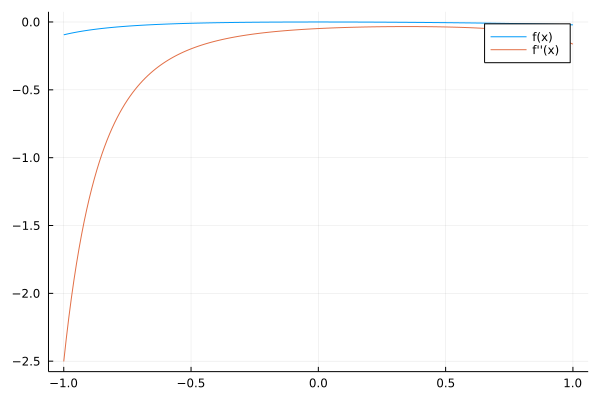

In [3]:
using Plots

plot(-1:.01:1, [f, d2x(f)], labels=["f(x)" "f''(x)"])

# Computational Convergence

The following routine fits a linear function to a set of observed points $y_n$.

In [4]:
function linear_fit(x, y)
    n = length(x)
    
    b = [sum(y); sum([xn * yn for (xn, yn) in zip(x, y)])]
    A = [n      sum(x);
         sum(x) sum([xn^2 for xn in x])]
    
    det = A[1, 1]*A[2, 2] - A[1, 2]*A[2, 1]
    inv = [A[2, 2] -A[1, 2]; -A[2, 1] A[1, 1]]
    b, a = 1/det * inv * b
    
    return a, b
end

linear_fit (generic function with 1 method)

Here, we test this routine on the function $f(x) = 3x + 2$. It correctly recovers the coefficient 3 and intercept 2.

In [5]:
domain = 1:10
a, b = linear_fit(domain, domain .* 3 .+ 2)

(3.0, 1.9999999999999858)

# Computing Errors

The following two routines are part of a library module that handles error calculations.

In [6]:
module error
    function relative_err(y, yhat)
        y - yhat
    end

    function absolute_err(y, yhat)
        abs(relative_err(y, yhat))
    end
end

Main.error

# Explicit Euler Method

A logistic equation models some population or concentration, limited by a carrying capacity. It is parameterized by a reproduction/growth constant, $\alpha$, and a predation/decay constant, $\beta$. The growth rate is modeled by: $\frac{dP}{dt} = \alpha P - \beta P^2$.

The following is an implementation of the explicit Euler method for solving such equations.

In [7]:
function explicit_euler(f, x0, domain)
    n = length(domain)
    # Assumes an evenly spaced domain
    h = domain[2] - domain[1]
    
    yhat = Array{Float64}(undef, n)
    yhat[1] = x0
    
    for i in 2:n
        yn = yhat[i-1]
        tn = domain[i-1]
        yhat[i] = yn + h*f(yn)
    end
    
    yhat
end

explicit_euler (generic function with 1 method)

To use this method, first we define our logistic equation's derivative. Then we can define a domain over which to approximate our solution, and use the explicit Euler method to solve. Observe how the carrying capacity and growth rate change based on $\alpha$ and $\beta$ (graphs are not to scale).

In [8]:
function logistic(alpha, beta)
    P -> alpha * P - beta * P^2
end

logistic (generic function with 1 method)

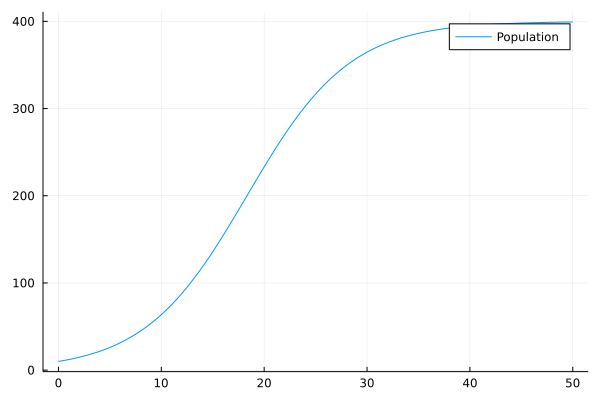

In [9]:
domain = 0:0.01:50

alpha = 0.2
beta = 0.0005
P0 = 10.0

l = logistic(alpha, beta)
plot(domain, explicit_euler(l, P0, domain), label="Population")

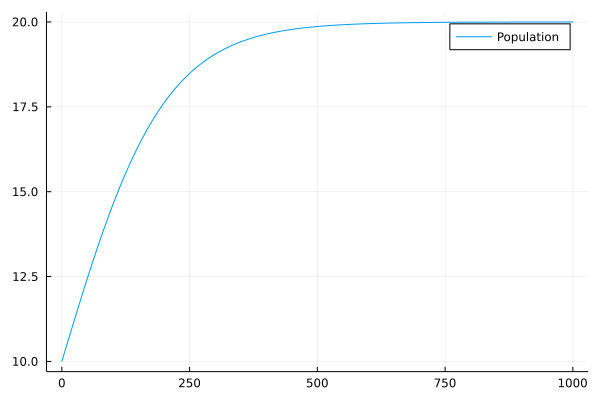

In [10]:
domain = 0:0.01:1000

alpha = 0.01
beta = 0.0005
P0 = 10.0

l = logistic(alpha, beta)
plot(domain, explicit_euler(l, P0, domain), label="Population")

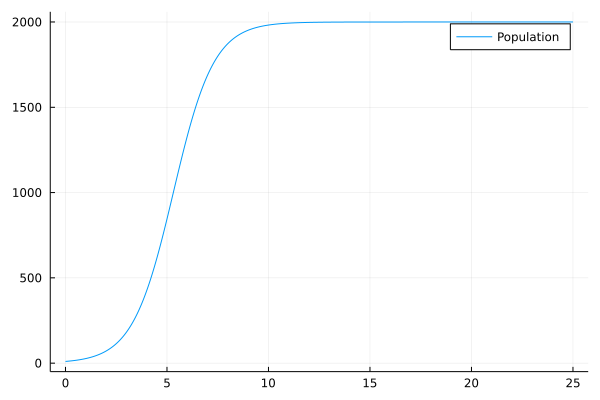

In [11]:
domain = 0:0.01:25

alpha = 1.0
beta = 0.0005
P0 = 10.0

l = logistic(alpha, beta)
plot(domain, explicit_euler(l, P0, domain), label="Population")